<a href="https://colab.research.google.com/github/H24-D/Gen-ai-lab/blob/main/program2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Model found! Loading the saved model...
Fetching word embeddings...
Applying PCA...


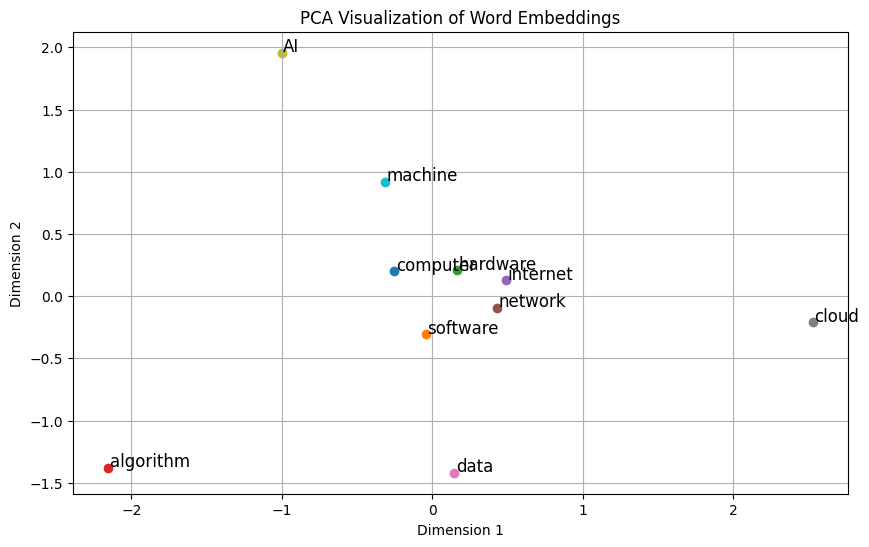

Applying t-SNE...


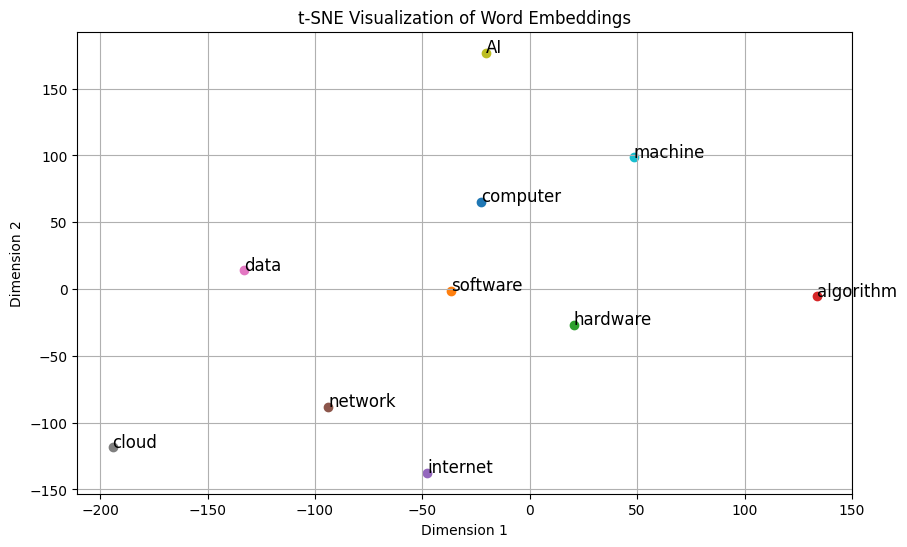

Finding words similar to 'computer'...
Top similar words: ['computers', 'laptop', 'laptop_computer', 'Computer', 'com_puter']


In [5]:
import gensim
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os

model_path = "/content/drive/My Drive/word2vec-google-news-300.model"

from google.colab import drive
drive.mount('/content/drive')
if os.path.exists(model_path):
  print(" Model found! Loading the saved model...")
  word2vec_model = gensim.models.KeyedVectors.load(model_path, mmap='r')
else:
  print("Model not found. Downloading now...")
  word2vec_model = api.load("word2vec-google-news-300")
  print("Saving model to Google Drive...")
  word2vec_model.save(model_path)
  print(" Model saved successfully!")

def get_word_vectors(model, words):
  return np.array([model[word] for word in words if word in model])

def reduce_dimensions(vectors, method='pca'):
  if method == 'pca':
    reducer = PCA(n_components=2)
  elif method == 'tsne':
    reducer = TSNE(n_components=2, random_state=42, perplexity=5)
  else:
    raise ValueError("Method should be 'pca' or 'tsne'")
  return reducer.fit_transform(vectors)

def plot_embeddings(words, reduced_vectors, title):
  plt.figure(figsize=(10, 6))
  for word, coord in zip(words, reduced_vectors):
    plt.scatter(coord[0], coord[1], marker='o')
    plt.text(coord[0] + 0.01, coord[1] + 0.01, word, fontsize=12)

  plt.title(title)
  plt.xlabel("Dimension 1")
  plt.ylabel("Dimension 2")
  plt.grid()
  plt.show()

def find_similar_words(model, word, top_n=5):

  if word in model:
    similar_words = model.most_similar(word, topn=top_n)
    return [w[0] for w in similar_words]
  else:
    return ["Word not in vocabulary"]

tech_words = ["computer", "software", "hardware", "algorithm", "internet",

"network", "data", "cloud", "AI", "machine"]

print("Fetching word embeddings...")
word_vectors = get_word_vectors(word2vec_model, tech_words)
print("Applying PCA...")
reduced_vectors_pca = reduce_dimensions(word_vectors, method='pca')
plot_embeddings(tech_words, reduced_vectors_pca, title="PCA Visualization of Word Embeddings")
print("Applying t-SNE...")
reduced_vectors_tsne = reduce_dimensions(word_vectors, method='tsne')
plot_embeddings(tech_words, reduced_vectors_tsne, title="t-SNE Visualization of Word Embeddings")

input_word = "computer"
print(f"Finding words similar to '{input_word}'...")
similar = find_similar_words(word2vec_model, input_word)
print("Top similar words:", similar)

In [7]:
# Reinstall a clean and stable version of NumPy
!pip uninstall -y numpy
!pip install numpy==1.24.3




Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.24.3 wh